In [2]:
import json
import numpy as np
from matplotlib import pyplot
pyplot.style.use('ggplot')

# Plotting configuration
cases = [(0, 0), (0, 1), (1, 1), (1, 0)]
markers = [
    '.' if actual == classified else 'X'
    for (actual, classified) in cases
]
colors = ['blue', 'blue', 'red', 'red']

# Q# configuration and necessary imports
import qsharp
qsharp.packages.add("Microsoft.Quantum.MachineLearning::0.11.2004.2825")
qsharp.reload()

import Microsoft.Quantum.Kata.QuantumClassification as QuantumClassification

def plot_data (features : list, actual_labels : list, classified_labels : list = None, extra_lines : list = None):
    """Plots the data, labeling it with actual labels if there are no classification results provided, 
    and with the classification results (indicating their correctness) if they are provided.
    """
    samples = np.array(features)
    pyplot.figure(figsize=(8, 8))
    for (idx_case, ((actual, classified), marker, color)) in enumerate(zip(cases, markers, colors)):
        mask = np.logical_and(np.equal(actual_labels, actual), 
                              np.equal(actual if classified_labels == None else classified_labels, classified))
        if not np.any(mask): continue
        pyplot.scatter(
            samples[mask, 0], samples[mask, 1],
            label = f"Class {actual}" if classified_labels == None else f"Was {actual}, classified {classified}",
            marker = marker, s = 300, c = [color],
        )
    # Add the lines to show the true classes boundaries, if provided
    if extra_lines != None:
        for line in extra_lines:
            pyplot.plot(line[0], line[1], color = 'gray')
    pyplot.legend()
    pyplot.show()



Adding package Microsoft.Quantum.MachineLearning::0.11.2004.2825.

In [40]:
json_data = []
with open('training_data6.json', 'r') as data:
    json_data = json.loads(data.readline())
    
    
def separation_endpoint (angle : float) -> (float, float):
    if (angle < math.pi / 4):
        return (1, math.tan(angle))
    return (1/math.tan(angle), 1)

import math 
# Set up lines that show class separation
separation_angles = [math.pi / 4]
separation_lines = list(zip([(0,0), (0,0)], list(map(separation_endpoint, separation_angles))))
extra_lines = []
for line in separation_lines:
    extra_lines.append([[line[0][0], line[1][0]], [line[0][1], line[1][1]]])

In [4]:
def normalize(data):
    return [d / np.linalg.norm(d) for d in data]

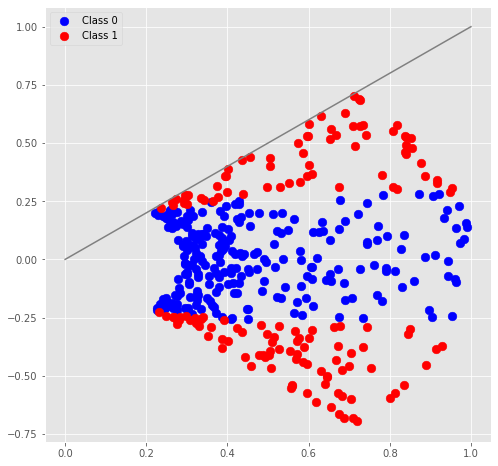

In [46]:
mode = 4
auxil = [0.3, 1.0]
plot_data(
    normalize(
        QuantumClassification.FeaturesPreprocess.simulate(mode = mode, auxil = auxil, input = d) for d in json_data['Features']
    ),
    json_data['Labels'], 
    extra_lines = extra_lines
)

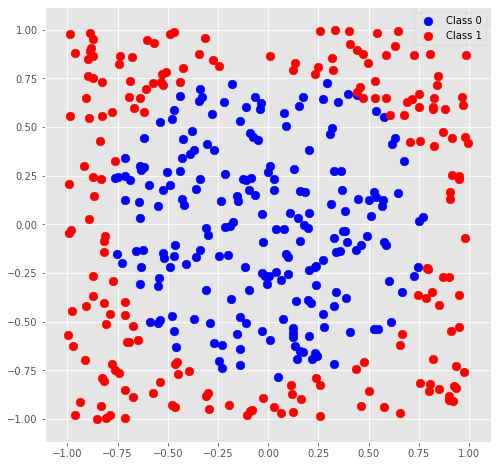

In [55]:
json_data = []
with open('training_data5.json', 'r') as data:
    json_data = json.loads(data.readline())

plot_data(json_data['Features'], json_data['Labels'])

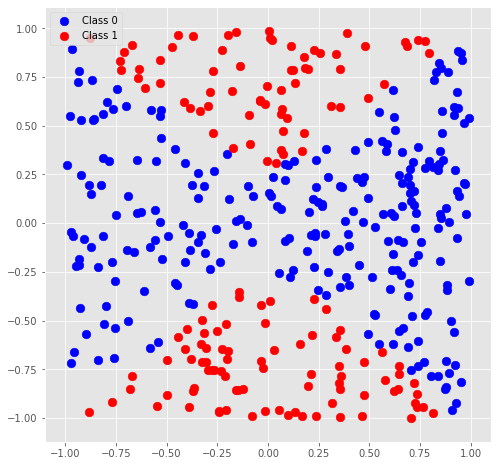

In [56]:
json_data = []
with open('training_data6.json', 'r') as data:
    json_data = json.loads(data.readline())

plot_data(json_data['Features'], json_data['Labels'])

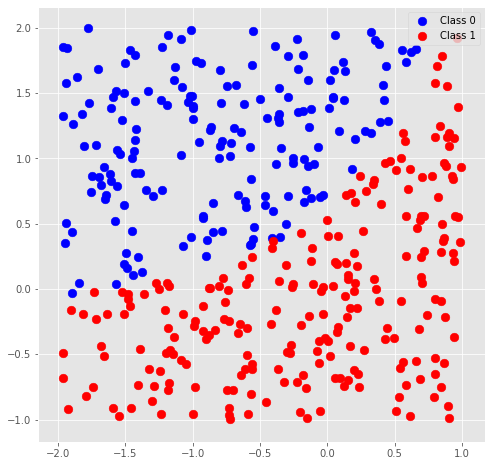

In [57]:
json_data = []
with open('training_data7.json', 'r') as data:
    json_data = json.loads(data.readline())

plot_data(json_data['Features'], json_data['Labels'])

In [ ]:
(parameters, bias) = QuantumClassification.TrainHalfMoonModel.simulate(
    trainingVectors = json_data['Features'],
    trainingLabels = json_data['Labels'],
    initialParameters = [
        [0.060057, 3.00522,  2.03083,  0.63527,  1.03771, 1.27881, 4.10186,  5.34396],
        [0.586514, 3.371623, 0.860791, 2.92517,  1.14616, 2.99776, 2.26505,  5.62137],
        [1.69704,  1.13912,  2.3595,   4.037552, 1.63698, 1.27549, 0.328671, 0.302282],
        [5.21662,  6.04363,  0.224184, 1.53913,  1.64524, 4.79508, 1.49742,  1.545]
     ],
    mode = mode,
    auxil = auxil
)

Ready to train.
  Beginning training at start point #0...
    Pre-encoding samples...
    Beginning epoch 1.
        Beginning minibatch 0 of 13.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
      Estimating gradient at sample 7...
      Estimating gradient at sample 8...
      Estimating gradient at sample 9...
      Estimating gradient at sample 10...
      Estimating gradient at sample 11...
      Estimating gradient at sample 12...
      Estimating gradient at sample 13...
      Estimating gradient at sample 14...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 1 of 13.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sampl

        Beginning minibatch 11 of 13.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
      Estimating gradient at sample 7...
      Estimating gradient at sample 8...
      Estimating gradient at sample 9...
      Estimating gradient at sample 10...
      Estimating gradient at sample 11...
      Estimating gradient at sample 12...
      Estimating gradient at sample 13...
      Estimating gradient at sample 14...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 12 of 13.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating g

        Beginning minibatch 44 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 45 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 46 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 47 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 48 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 49 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 50 of 

        Beginning minibatch 95 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 96 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 97 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 98 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 99 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 100 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 101 o

        Beginning minibatch 146 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 147 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 148 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 149 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 150 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 151 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 

        Beginning minibatch 8 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 9 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 10 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 11 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 12 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commitin

        Beginning minibatch 53 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 54 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 55 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 56 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
        Beginning minibatch 57 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 58 of 94.
      Estimating gradient at sample 0.

      Estimating gradient at sample 7...
      Estimating gradient at sample 8...
      Estimating gradient at sample 9...
      Estimating gradient at sample 10...
      Estimating gradient at sample 11...
      Estimating gradient at sample 12...
      Estimating gradient at sample 13...
      Estimating gradient at sample 14...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 2 of 13.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
      Estimating gradient at sample 7...
      Estimating gradient at sample 8...
      Estimating gradient at sample 9...
      Estimating gradient at sample 10...
      Estimating gradient at sample 11...
      Estimating gradient at sample 12...
      Estimat

    Beginning epoch 5.
        Beginning minibatch 0 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 1 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 2 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 3 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 4 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 5 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning

        Beginning minibatch 51 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 52 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 53 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 54 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 55 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 56 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 57 of 

        Beginning minibatch 102 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 103 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 104 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 105 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 106 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 107 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 

        Beginning minibatch 153 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 154 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 155 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 156 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 157 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 158 of 188.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 

        Beginning minibatch 13 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
        Beginning minibatch 14 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 15 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 16 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 17 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 18 of 94.
      Estimating gradient at sample 0.

        Beginning minibatch 59 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 60 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 61 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 62 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 63 of 94.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
        Beginning minibatch 64 of 94.
      Estimating gradient at sample 0.

            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 9 of 63.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 10 of 63.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 11 of 63.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 12 of 63.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good paramet

        Beginning minibatch 43 of 63.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 44 of 63.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 45 of 63.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 46 of 63.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 47 o

      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 13 of 47.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 14 of 47.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 15 of 47.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 1

            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 43 of 47.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 44 of 47.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 45 of 47.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 46 of 47.
      Estimating gradient at sam

      Estimating gradient at sample 4...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 22 of 37.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 23 of 37.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 24 of 37.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at

      Estimating gradient at sample 6...
      Estimating gradient at sample 7...
      Estimating gradient at sample 8...
      Estimating gradient at sample 9...
      Estimating gradient at sample 10...
      Estimating gradient at sample 11...
      Estimating gradient at sample 12...
      Estimating gradient at sample 13...
      Estimating gradient at sample 14...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 5 of 13.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
      Estimating gradient at sample 7...
      Estimating gradient at sample 8...
      Estimating gradient at sample 9...
      Estimating gradient at sample 10...
      Estimating gradient at sample 11...
      Estimati

            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 15 of 184.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 16 of 184.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 17 of 184.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 18 of 184.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 19 of 184.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 20 of 184.
      Estimating gradient at sample 0...
            Observed good paramete

In [94]:
(parameters, bias) = QuantumClassification.TrainLinearlySeparableModel.simulate(
    trainingVectors = json_data['Features'],
    trainingLabels = json_data['Labels'],
    initialParameters = [[0.0]],
    mode = mode,
    auxil = auxil
)

  Beginning training at start point #0...
    Pre-encoding samples...
    Beginning epoch 1.
        Beginning minibatch 0 of 13.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
      Estimating gradient at sample 7...
      Estimating gradient at sample 8...
      Estimating gradient at sample 9...
      Estimating gradient at sample 10...
      Estimating gradient at sample 11...
      Estimating gradient at sample 12...
      Estimating gradient at sample 13...
      Estimating gradient at sample 14...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 1 of 13.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Est

        Beginning minibatch 11 of 13.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
      Estimating gradient at sample 7...
      Estimating gradient at sample 8...
      Estimating gradient at sample 9...
      Estimating gradient at sample 10...
      Estimating gradient at sample 11...
      Estimating gradient at sample 12...
      Estimating gradient at sample 13...
      Estimating gradient at sample 14...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 12 of 13.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating g

            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 48 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 49 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 50 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 51 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 52 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 53 of 190.
      Estimating gradient at sample 0...
            Observed good paramete

        Beginning minibatch 101 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 102 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 103 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 104 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 105 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 106 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 

        Beginning minibatch 153 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 154 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 155 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 156 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 157 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 158 of 190.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 

        Beginning minibatch 20 of 95.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 21 of 95.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
        Beginning minibatch 22 of 95.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 23 of 95.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 24 of 95.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 25 of 95.
      Estimating gradient at sample 0.

        Beginning minibatch 76 of 95.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
        Beginning minibatch 77 of 95.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
        Beginning minibatch 78 of 95.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 79 of 95.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 80 of 95.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 81 of 95.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
        Beginning minibatch 82 of 95.

      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 26 of 64.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 27 of 64.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 28 of 64.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 29 of 64.
      Estimating gradient at sample 0...
      Estimating gradient at sam

        Beginning minibatch 61 of 64.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 62 of 64.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 63 of 64.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly commiting.
    Beginning epoch 5.
        Beginning minibatch 0 of 48.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 1 of 48.
      Estimati

      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
        Beginning minibatch 35 of 48.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 36 of 48.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 37 of 48.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 

        Beginning minibatch 16 of 39.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 17 of 39.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 18 of 39.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 

      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 9 of 34.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 10 of 34.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
        Beginning minibatch 11 of 34.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at

      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 1 of 28.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 2 of 28.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient 

      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 24 of 28.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 25 of 28.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradien

      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
      Estimating gradient at sample 7...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 16 of 24.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
      Estimating gradient at sample 7...
            Observed good parameter update... estimating and possibly commiting.
        Beginning minibatch 17 of 24.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradien

In [99]:
print(parameters, bias)

[0.5923199020859999, 3.337572979323, 0.9420351233343908, 2.982686831366797, 1.2639117203041408, 3.137100737356172, 2.337873325871953, 5.52438414223414] -0.05784999999999996


In [100]:
# Validation parameters
tolerance = 0.0005
nMeasurements = 10_000

# Classify validation data set using training results
classified_labels = QuantumClassification.ClassifyHalfMoonModel.simulate(
    samples = json_data['Features'],
    parameters = parameters, bias = bias,
    tolerance = tolerance, nMeasurements = nMeasurements,
    mode = mode,
    auxil = auxil
)

# Calculate miss rate
mask = np.not_equal(json_data['Labels'], classified_labels)
miss_count = np.array(classified_labels)[np.where(mask)].size
miss_rate = miss_count / len(classified_labels)
print(f"Miss rate: {miss_rate:0.2%}")

Miss rate: 1.50%


In [96]:
# Validation parameters
tolerance = 0.0005
nMeasurements = 10_000

# Classify validation data set using training results
classified_labels = QuantumClassification.ClassifyLinearlySeparableModel.simulate(
    samples = json_data['Features'],
    parameters = parameters, bias = bias,
    tolerance = tolerance, nMeasurements = nMeasurements,
    mode = mode,
    auxil = auxil
)

# Calculate miss rate
mask = np.not_equal(json_data['Labels'], classified_labels)
miss_count = np.array(classified_labels)[np.where(mask)].size
miss_rate = miss_count / len(classified_labels)
print(f"Miss rate: {miss_rate:0.2%}")

Miss rate: 47.75%


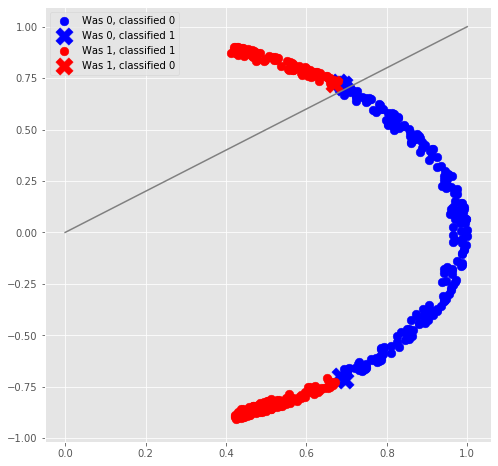

In [101]:
plot_data(
    normalize(
        QuantumClassification.FeaturesPreprocess.simulate(mode = mode, auxil = auxil, input = d) for d in json_data['Features']
    ), 
    json_data['Labels'], 
    classified_labels, 
    extra_lines = extra_lines
)

In [58]:
QuantumClassification.TestOperation.simulate(features = json_data['Features'], labels = json_data['Labels'])

True